# The NBD Regression
##  Estimate all relevant parameters for NBD regression using MLE. Report your code, the estimated parameters and the maximum value of the log-likelihood. Evaluate the NBD regression vis-à-vis the Poisson regression; explain which is better and why. Predict the number of people with 0, ..., 23 exposures based on the NBD regression. Explain how the predicted values are obtained using the case of 2 exposures (show your calculations). Graph the original and predicted numbers of exposures.

In [1]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize
from scipy.stats import chi2
from scipy.stats import gamma

<hr style="border:2px solid black">
<b>Read in the data and drop ID</b>
<hr style="border:2px solid black">

In [2]:
chikak = pd.read_csv("khakichinos.csv")
chikak =chikak.drop(columns=['ID'])

In [3]:
chikak

,NumberofVisits,LnInc,Sex,LnAge,HHSize
0,0,11.379394,1,3.871201,2
1,5,9.769956,1,4.043051,1
2,0,11.082143,0,3.332205,2
3,0,10.915088,1,3.951244,3
4,0,10.915088,1,2.833213,3
...,...,...,...,...,...
2723,0,9.528794,1,2.944439,2
2724,0,11.379394,0,3.970292,2
2725,0,11.191342,1,3.044522,3
2726,0,10.532096,1,2.890372,4


<hr style="border:2px solid black">
<b>Define the funtions needed</b><br>
<b>1. the log-likelihood</b>
<hr style="border:2px solid black">

In [4]:
def nbdreg_p (params, noVisits, LcInc, Sex, lnAge, HHSize):
    n, alpha, b1, b2, b3, b4 = params
    
    exp_b= []
    p1 = []
    p2 = []
    p3 = []
    prob = []
    ln_prob = []
    
    pds = list(range(0, len(noVisits)))
    for i in pds:
        exp_b.append(np.exp((LcInc[i]*b1)+(Sex[i]*b2)+(lnAge[i]* b3) + (HHSize[i]*b4)))
        p1.append(((math.gamma(n+noVisits[i]))/(math.gamma(n)*math.factorial(noVisits[i]))))
        p2.append((alpha/(alpha+exp_b[i]))**n)
        p3.append((exp_b[i]/(alpha+exp_b[i]))**noVisits[i])
        prob.append(p1[i]*p2[i]*p3[i])
        ln_prob.append(np.log(prob[i]))

    return sum(ln_prob)
            

<hr style="border:2px solid black">
<b>2. the negative of the log-likelihood</b>
<hr style="border:2px solid black">

In [5]:
def n_nbdreg_p (params, noVisits, LcInc, Sex, lnAge, HHSize):
    return(-np.sum(nbdreg_p (params, noVisits, LcInc, Sex, lnAge, HHSize)))

<hr style="border:2px solid black">
<b>Specify the information needed for the optimizer</b>
<hr style="border:2px solid black">

In [6]:
noVisits = chikak.NumberofVisits
LcInc = chikak.LnInc
Sex = chikak.Sex
lnAge = chikak.LnAge
HHSize= chikak.HHSize
params = np.array((0.1,1,0.01,0.00,0.5,0.00))

In [7]:
n_nbdreg_p(params,noVisits, LcInc, Sex, lnAge, HHSize)

2923.201932899652

<hr style="border:2px solid black">
<b>Call the optimizer</b>
<hr style="border:2px solid black">

In [8]:
res_nbd = minimize(
    n_nbdreg_p,
    params,
    tol=1e-10,
    #options={'ftol' : 1e-8},
    #bounds=[(None, None), (None, None), (None, None), (None, None),(None, None)],
    args = (noVisits, LcInc, Sex, lnAge, HHSize)
)

<hr style="border:2px solid black">
<b>Review the result</b>
<hr style="border:2px solid black">

In [9]:
res_nbd

      fun: 2888.966113802933
 hess_inv: array([[ 3.94183145e-05,  1.69598045e-05, -9.15199427e-06,
         6.07462693e-05, -5.73982568e-05, -3.40454175e-05],
       [ 1.69598045e-05,  2.89703186e-04,  1.41971787e-04,
         2.15615618e-04, -2.81772884e-04, -2.13391326e-04],
       [-9.15199427e-06,  1.41971787e-04,  9.11149997e-05,
         6.79071719e-05, -1.23967016e-04, -9.91346790e-05],
       [ 6.07462693e-05,  2.15615618e-04,  6.79071719e-05,
         5.18087477e-04, -3.62769058e-04, -3.14445798e-04],
       [-5.73982568e-05, -2.81772884e-04, -1.23967016e-04,
        -3.62769058e-04,  3.88942276e-04,  2.89663786e-04],
       [-3.40454175e-05, -2.13391326e-04, -9.91346790e-05,
        -3.14445798e-04,  2.89663786e-04,  3.18088432e-04]])
      jac: array([ 5.49316406e-04, -3.05175781e-04, -5.49316406e-04, -3.05175781e-05,
       -7.32421875e-04, -4.88281250e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 896
      nit: 55
     njev: 12

<hr style="border:2px solid black">
<b>Get shape_n, alpha, beta 1, beta 2, beta 3, and beta 4</b>
<hr style="border:2px solid black">

In [10]:
shape_n = res_nbd.x[0]
alpha = res_nbd.x[1]
b1 = res_nbd.x[2]
b2= res_nbd.x[3]
b3= res_nbd.x[4]
b4= res_nbd.x[5]

In [11]:
shape_n, alpha, b1, b2, b3,b4

(0.13875168024785928,
 8.203082850780396,
 0.07344033211144213,
 -0.009268436053055173,
 0.9022282652028637,
 -0.024316479519792503)

<b>The estimated parameters for Poisson model: shape_n = 0.13875, alpha = 8.2030, beta 1(Lnlnc) = 0.0734, beta 2(Sex) = -0.0092, beta 3(LnAge) = 0.9022, and beta 4(HHSize) =-0.0243 and with the maximum value of the log-likelihood being approximately -2888.966<b>

<hr style="border:2px solid black">
<b>Get total numbers of visits</b>
<hr style="border:2px solid black">

In [12]:
total_vis = chikak.NumberofVisits.sum()

<hr style="border:2px solid black">
<b>Define a function to make predictions</b>
<hr style="border:2px solid black">

In [13]:
noVisits = chikak.NumberofVisits
LcInc = chikak.LnInc
Sex = chikak.Sex
lnAge = chikak.LnAge
HHSize= chikak.HHSize

In [14]:
    exp_b= {}
    p1 = {}
    p2 = {}
    p3 = {}
    prob = {}
    ln_prob = {}
    
    pds = list(range(0, len(noVisits)))
    for i in pds:
        exp_b[i] =(np.exp((LcInc[i]*b1)+(Sex[i]*b2)+(lnAge[i]* b3) + (HHSize[i]*b4)))
        p1[i] = (((math.gamma(shape_n+noVisits[i]))/(math.gamma(shape_n)*math.factorial(noVisits[i]))))
        p2[i]=((alpha/(alpha+exp_b[i]))**shape_n)
        p3[i] = ((exp_b[i]/(alpha+exp_b[i]))**noVisits[i])
        prob[i] = (p1[i]*p2[i]*p3[i])
        ln_prob[i]=(np.log(prob[i]))


In [15]:
chikak['exp_b'] = pd.Series(exp_b)
chikak['p1'] = pd.Series(p1)
chikak['p2'] = pd.Series(p2)
chikak['p3'] = pd.Series(p3)
chikak['prob'] = pd.Series(prob)
chikak['ln_prob'] = pd.Series(ln_prob)

<b>Make predictions<b>

In [16]:
chikak

,NumberofVisits,LnInc,Sex,LnAge,HHSize,exp_b,p1,p2,p3,prob,ln_prob
0,0,11.379394,1,3.871201,2,71.558268,1.000000,0.729355,1.000000,0.729355,-0.315595
1,5,9.769956,1,4.043051,1,76.071907,0.036582,0.723806,0.599278,0.015868,-4.143450
2,0,11.082143,0,3.332205,2,43.451804,1.000000,0.774674,1.000000,0.774674,-0.255313
3,0,10.915088,1,3.951244,3,72.552730,1.000000,0.728102,1.000000,0.728102,-0.317314
4,0,10.915088,1,2.833213,3,26.458964,1.000000,0.818764,1.000000,0.818764,-0.199960
...,...,...,...,...,...,...,...,...,...,...,...
2723,0,9.528794,1,2.944439,2,27.070714,1.000000,0.816778,1.000000,0.816778,-0.202387
2724,0,11.379394,0,3.970292,2,78.979088,1.000000,0.720408,1.000000,0.720408,-0.327938
2725,0,11.191342,1,3.044522,3,32.672449,1.000000,0.800244,1.000000,0.800244,-0.222838
2726,0,10.532096,1,2.890372,4,26.435859,1.000000,0.818839,1.000000,0.818839,-0.199867


In [17]:
predicted_counts = {}
prob_2 ={}
p2= {}
p3 = {}
predict ={}
for visits in range(0, 23):
        prob_2[visits] = chikak.loc[ chikak['NumberofVisits'] == visits, 'prob'].sum()
        predicted_counts[visits] = prob[visits].sum()
        p2[visits] = chikak.loc[ chikak['NumberofVisits'] == visits, 'NumberofVisits'].count()
        p3[visits] = prob_2[visits]/p2[visits]
        predict[visits] = p3[visits]*total_vis

C:\Users\Phuc Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Phuc Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [18]:
predict

{0: 1965.449704934042,
 1: 233.15965697294752,
 2: 116.71027205906529,
 3: 73.30657669448934,
 4: 50.81567240652887,
 5: 37.929209691315606,
 6: 28.266295213885424,
 7: 23.387323670671844,
 8: 16.529623362679434,
 9: 13.442489386383313,
 10: 10.464507380770307,
 11: 9.802957400116716,
 12: 6.421738184143002,
 13: nan,
 14: 5.062817318122562,
 15: 4.148365713518263,
 16: 3.3725419071850244,
 17: 2.411537514865722,
 18: 1.1602319846425642,
 19: nan,
 20: 1.3755738537897007,
 21: 1.45969207685334,
 22: 0.759104462474601}

<b>The predicted values are obtained using the case of 2 exposures is 116.<b>

In [19]:
plot_data = pd.DataFrame({
    'Original Counts': pd.Series(p2),
    'Predicted Counts': pd.Series(predict)
})

<b><hr style="border:2px solid black">
<b>Plot the actual values and predictions</b>
<hr style="border:2px solid black"><b>

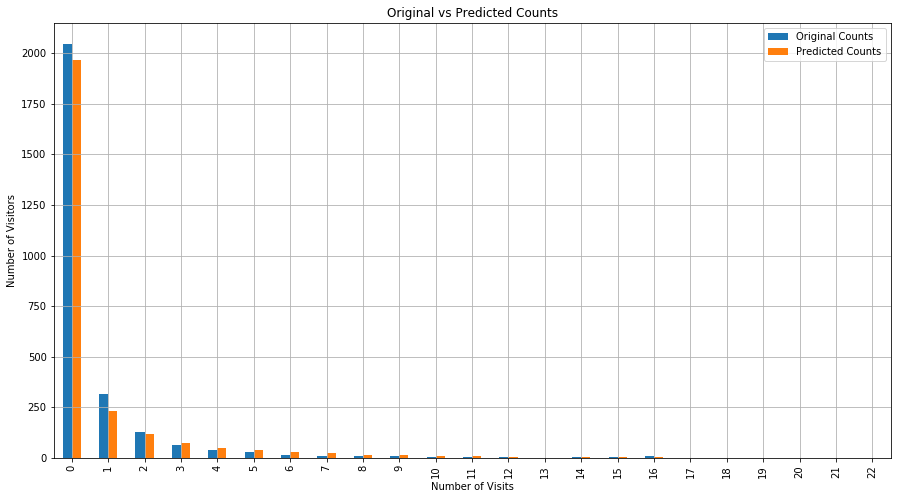

In [20]:
import matplotlib.pyplot as plt
plot_data.plot(kind='bar', stacked=False,figsize=(15, 8))
plt.xlabel('Number of Visits')
plt.ylabel('Number of Visitors')
plt.title('Original vs Predicted Counts')
plt.legend()
plt.grid(True)
plt.show()

<b>The graph above displays the original versus the predicted counts across different exposure levels. The original counts are shown in blue, while the predicted counts, based on the NBD Regression with the estimated parameter, are shown in orange.<b>